In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras 
from keras.layers import Activation,Convolution2D,MaxPooling2D,UpSampling2D,Dense,Flatten,Reshape,UpSampling2D,ZeroPadding2D
from keras.models import Sequential
import cv2
import pandas as pd
import os

In [8]:
images=os.listdir('../cat-dog-images')
data=[]
for ix in range(5000):
    img=cv2.imread('../cat-dog-images/'+images[ix])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(64,64))
    data.append(img)
data=np.array(data)

In [9]:
y=[]
for ix in data:
    img=ix
    #print img.shape
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    y.append(img)
y=np.array(y)    
        

In [10]:
y=np.reshape(y,(5000,64,64,1))

In [11]:
y_train=y[:4500]/255.0
X_train=data[:4500]/255.0
X_test=data[4500:]/255.0
y_test=y[4500:]/255.0

In [18]:
plt.imshow(data)

(64, 64, 3)


In [13]:
model=Sequential()
model.add(Convolution2D(64,3,3,input_shape=(64,64,1),activation='relu'))
model.add(Convolution2D(128,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,5,5,activation='relu'))
model.add(Convolution2D(16,3,3,activation='relu'))


model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 62, 62, 64)    640         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 60, 60, 128)   73856       convolution2d_2[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 30, 30, 128)   0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 26, 26, 32)    102432      maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [14]:
model.fit(y_train,X_train,batch_size=100,nb_epoch=1,shuffle=True,validation_data=(y_test,X_test))

Train on 4500 samples, validate on 500 samples
Epoch 1/1
4500/4500 [==============================] - 999s - loss: 0.0928 - acc: 0.5795 - val_loss: 0.0425 - val_acc: 0.6711


In [15]:
out=model.predict(y[:10])
print out[0].shape

(64, 64, 3)


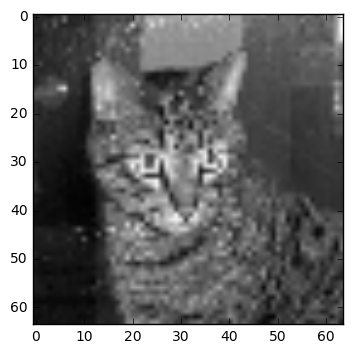

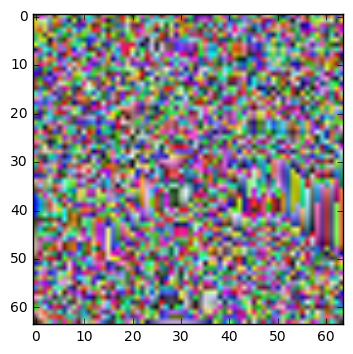

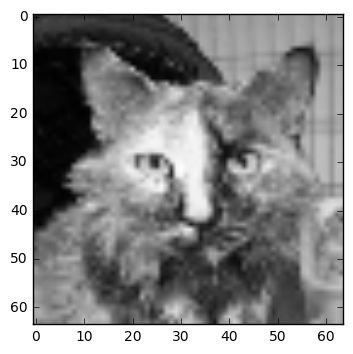

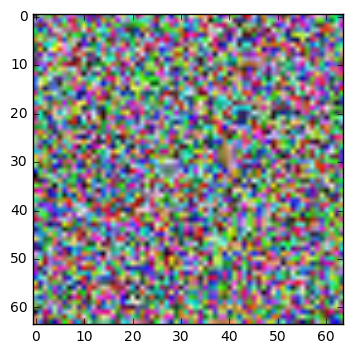

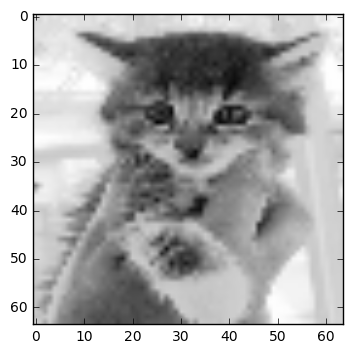

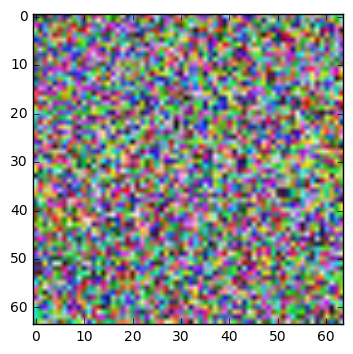

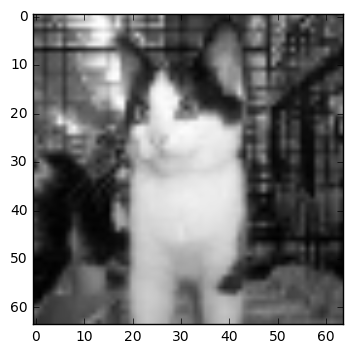

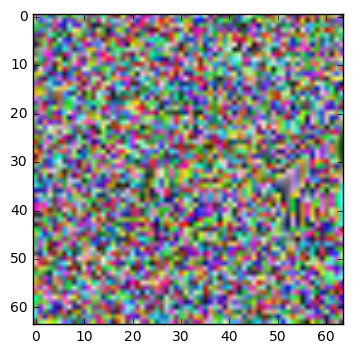

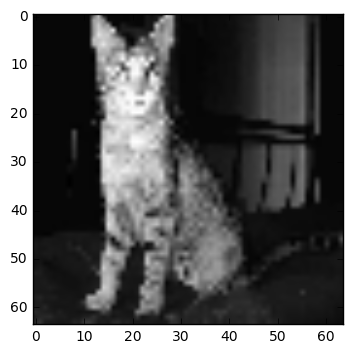

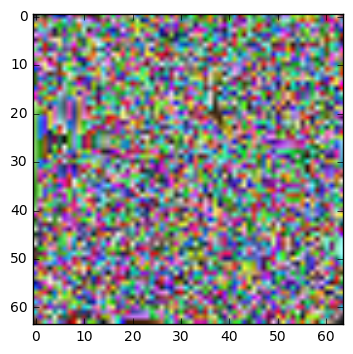

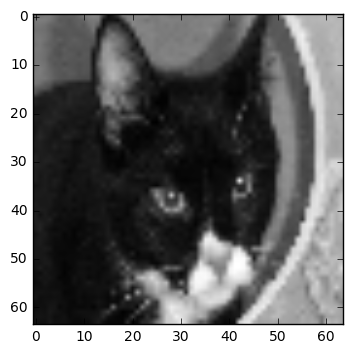

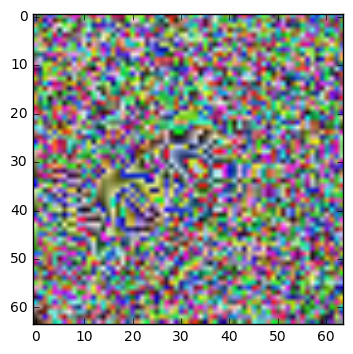

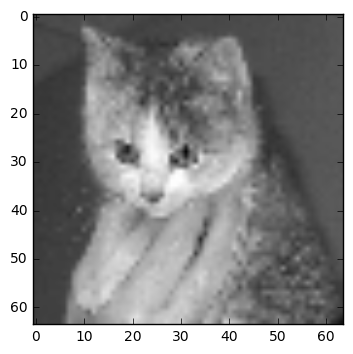

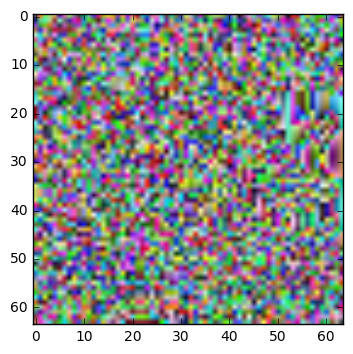

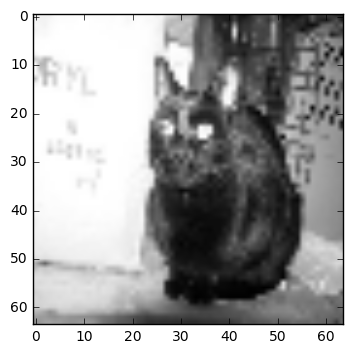

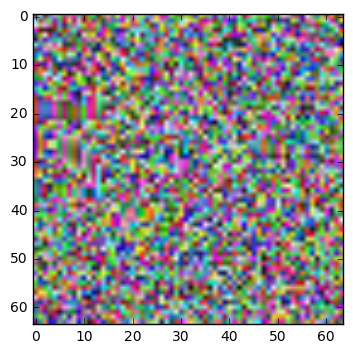

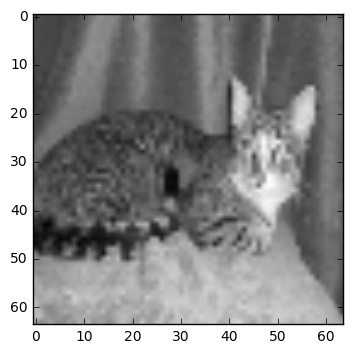

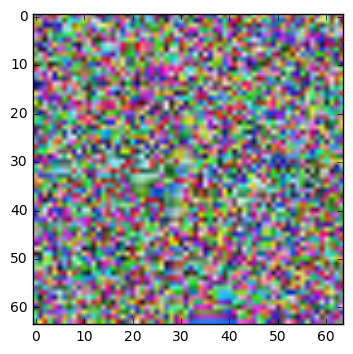

In [16]:
for ix in range(1,10):
    plt.imshow(y[ix].reshape(64,64),cmap='gray')
    plt.show()
    plt.imshow(out[ix])
    plt.show()